# <center>   Model Devloppement
   

 <h1> <center> N features 

<img src="Downloads\car-price-prediction_Model-selection.png">

### In this part of our project we will,predict the price of house using multiple machine learning models, then evaluate each model and select the best. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,\
VotingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm


from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix


from datetime import datetime

warnings.filterwarnings("ignore")

## 1-Data Preparation and Pre-processing

In [3]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",1000)
train_df=pd.read_csv("cars_price_prediction_22_features.csv")
train_df.drop(columns=["Unnamed: 0"],inplace=True)

In [4]:
data=pd.read_csv("House_price_prediction_No_Outliers.csv")
test_df=data[data["SalePrice"].isnull()]

test_df['Age']=datetime.now().year-test_df["YearBuilt"]

test_df[['GrLivArea_m2']]=test_df[['GrLivArea']]*0.092903
test_df[["GarageArea_m2"]]=test_df[["GarageArea"]]*0.092903
test_df[["TotalBsmt_m2"]]=test_df[["TotalBsmtSF"]]*0.092903
test_df[["1stFlr_m2"]]=test_df[["1stFlrSF"]]*0.092903

In [5]:
test_df=test_df[train_df.columns]
test_df.drop(columns=["SalePrice"],inplace=True)

In [6]:
df=pd.concat([train_df,test_df])
df["RemodAddAge"]=datetime.now().year-df.YearRemodAdd


In [7]:
df.drop(columns="YearRemodAdd",inplace=True)

<Axes: >

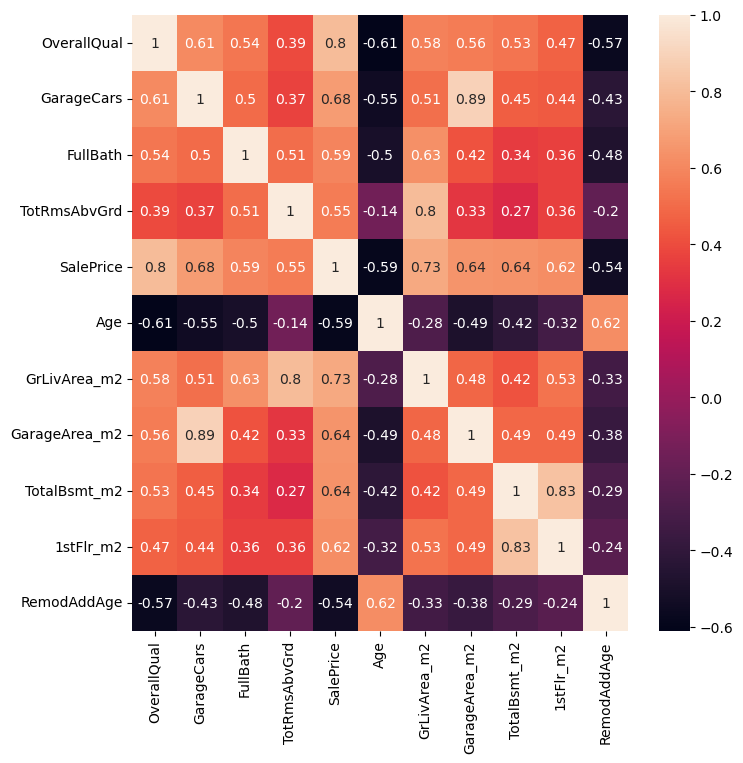

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [29]:
#cate_data=df.select_dtypes(include="object")
#cate_data

In [33]:
#encoder=OneHotEncoder()
#x_encoded=encoder.fit_transform(cate_data)
#X_encoded_df = pd.DataFrame(x_encoded.toarray(),
                            #columns=encoder.get_feature_names_out(cate_data.columns))
#X_encoded_df

In [25]:
# encoding categorical data 
train_df=pd.get_dummies(train_df)
# define predictor(X) and target(Y)
X=train_df.drop(columns="SalePrice")
Y=train_df["SalePrice"]
#X.shape

In [57]:
# Dementiality Reduction with PCA 
pca=PCA(n_components=10)#,svd_solver=solver)
X=pca.fit_transform(X)
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9'], dtype=object)

In [85]:
#pca.components_
pca.explained_variance_ratio_*100
pca.singular_values_
pca.mean_
pca.n_features_
pca.noise_variance_
pca.n_features_in_
pca.feature_names_in_

AttributeError: 'PCA' object has no attribute 'feature_names_in_'

In [43]:
# split data 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
print(x_train.shape,
      y_train.shape,
      x_test.shape,
      y_test.shape)

NameError: name 'X' is not defined

In [27]:
Model_=[]
Score=[]
RMSE=[]
def predict(ml_model,solver,n=15):
    
    X=train_df.drop(columns="SalePrice")
    Y=train_df[["SalePrice"]]
    
    #dimensionality reduction: 
    pca=PCA(n_components=n,svd_solver=solver)
    X=pca.fit_transform(X)
    
    
    #define trainig and testing data:
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
    
    #fit and train the model
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    
    #Training score
    print("Training score: {}".format(model.score(x_train,y_train)))
    
    #predictions
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions[0:5]))
    print('\n')
    
    # model evaluation
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
    print('MAE:{}'.format(mse(y_test,predictions)))
    print('MSE:{}'.format(mse(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mse(y_test,predictions))))
    
    Model_.append(type(ml_model).__name__)
    Score.append(np.round(r2score,3))
    RMSE.append(np.sqrt(mse(y_test,predictions)))
    
     
    #sns.distplot(y_test-predictions) 

In [28]:
all_models=[
LinearRegression(),
LogisticRegression(),
Ridge(),
Lasso(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
AdaBoostRegressor(),
#VotingRegressor(),
ExtraTreesRegressor(),
HistGradientBoostingRegressor(),
KNeighborsRegressor(),
]

In [29]:
svd_solver=['auto', 'full', 'arpack', 'randomized']

In [30]:
for regressor in all_models:
    print("___________")
    predict(regressor,"randomized",15)
    
    

___________
Model is: LinearRegression()
Training score: 0.8547813789613602
Predictions are: [[108723.54991623]
 [ 98664.53304966]
 [247736.63934148]
 [193486.9398512 ]
 [ 37658.7528328 ]]


r2 score is: 0.8555846855633447
MAE:732007048.4436673
MSE:732007048.4436673
RMSE:27055.62877561095
___________
Model is: LogisticRegression()
Training score: 0.36984815618221256
Predictions are: [128000.  60000. 181000. 208900.  79000.]


r2 score is: 0.6504595830551183
MAE:1771737643.7373738
MSE:1771737643.7373738
RMSE:42092.01401379333
___________
Model is: Ridge()
Training score: 0.8543639233391424
Predictions are: [[109049.42679175]
 [ 98670.73162715]
 [247440.31381491]
 [193819.56413133]
 [ 37313.98085507]]


r2 score is: 0.8549268502993744
MAE:735341459.699284
MSE:735341459.699284
RMSE:27117.18015759168
___________
Model is: Lasso()
Training score: 0.8543496236230769
Predictions are: [108836.75709591  98724.07309222 247767.05390574 193730.51855583
  37352.05642834]


r2 score is: 0.8549626556

In [40]:
Model_score_and_RMSE=pd.DataFrame({"Model":Model_,"R2_score":Score,"RMSE":RMSE})
Model_score_and_RMSE.sort_values(by="R2_score")

,Model,R2_score,RMSE
1,LogisticRegression,0.632,43161.925727
4,DecisionTreeRegressor,0.744,36013.071301
7,AdaBoostRegressor,0.818,30367.437594
10,KNeighborsRegressor,0.824,29840.495326
9,HistGradientBoostingRegressor,0.852,27383.258402
8,ExtraTreesRegressor,0.859,26757.043601
6,GradientBoostingRegressor,0.861,26559.689366
5,RandomForestRegressor,0.862,26452.885084
0,LinearRegression,0.867,25957.689348
2,Ridge,0.867,25962.119264


In [60]:
GBR=GradientBoostingRegressor()

In [59]:
# Parameters:
para={"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
     "learning_rate":[0,0.2,0.5,0.8,1],
      #"n_estimators":[100,200,300,400]
     "criterion" : ['friedman_mse', 'squared_error'],
      "max_features" : ['auto', 'sqrt', 'log2']
     }

In [61]:
gs_3cv=GridSearchCV(GBR,param_grid=para,cv=3)

In [63]:
predict(gs_3cv,solver="randomized")

Model is: GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9675540485733855
Predictions are: [126898.56066626 103040.55061374 257173.84499858 195658.40781427
  67555.42157472]


r2 score is: 0.8670864904065232
MAE:673707121.9582171
MSE:673707121.9582171
RMSE:25955.868738268367


In [64]:
gs_3cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_features': 'auto'}

In [65]:
gs_4cv=GridSearchCV(GBR,param_grid=para,cv=4)

In [67]:
predict(gs_4cv,solver="randomized")

Model is: GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9655332366345039
Predictions are: [128607.39067632  98039.79030218 253994.03818877 197793.74101717
  77776.44615119]


r2 score is: 0.8579364313478405
MAE:720086605.6768185
MSE:720086605.6768185
RMSE:26834.429482976127


In [68]:
gs_4cv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_features': 'auto'}

## Linear Regression

In [69]:
lr=LinearRegression()
para={"n_jobs":[None,0,1,10,100],
     "positive":[True,False]}
gs_lr=GridSearchCV(lr,param_grid=para,cv=3)

In [ ]:
predict(gs_lr,"randomized")

Model is: GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [None, 0, 1, 10, 100],
                         'positive': [True, False]})


Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "C:\Users\Conda3\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\Conda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 563, in run
    result_item, is_broken, bpe = self.wait_result_broken_or_wakeup()
  File "C:\Users\Conda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 617, in wait_result_broken_or_wakeup
    ready = wait(readers + worker_sentinels)
  File "C:\Users\Conda3\lib\multiprocessing\connection.py", line 879, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\Users\Conda3\lib\multiprocessing\connection.py", line 811, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 102


In [41]:
gs_lr.best_params_

{'n_jobs': None, 'positive': False}

## Ridge 

In [10]:
rr=Ridge()
param={"alpha":[10,1,0.1,0.001,0.0001],
      "solver":['auto', 'svd', 'cholesky','lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
     "random_state":range(1,100,10),
      "tol":[0.001,0.0001,0.00001]}
sg_rr=GridSearchCV(rr,param_grid=param,cv=3)

In [11]:
predict(sg_rr,solver="randomized")

Model is: GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [10, 1, 0.1, 0.001, 0.0001],
                         'random_state': range(1, 100, 10),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.001, 0.0001, 1e-05]})
Training score: 0.8352954563842236
Predictions are: [[120700.82311665]
 [ 86111.82397642]
 [252079.45822978]
 [208040.7560521 ]
 [ 36156.73950477]]


r2 score is: 0.8449892821928419
MAE:785712640.3926002
MSE:785712640.3926002
RMSE:28030.56618037888


In [12]:
sg_rr.best_params_

{'alpha': 10, 'random_state': 1, 'solver': 'lsqr', 'tol': 0.001}

## 	Hist Gradient Boosting Regressor	

In [14]:
hgbr=HistGradientBoostingRegressor()
param={"learning_rate":[0,0.2,0.5,0.8,1],
       "loss":['squared_error', 'absolute_error', 'poisson', 'quantile'],
      "l2_regularization":[0,0.1,0.5,1,5,10]}
sg_hgbr=GridSearchCV(hgbr,param_grid=param,cv=4)

In [15]:
predict(sg_hgbr,solver="randomized",n=15)

Model is: GridSearchCV(cv=4, estimator=HistGradientBoostingRegressor(),
             param_grid={'l2_regularization': [0, 0.1, 0.5, 1, 5, 10],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'poisson',
                                  'quantile']})
Training score: 0.997942273118231
Predictions are: [122554.86055303 110756.14703167 229058.48695154 200351.43963631
  67314.75313712]


r2 score is: 0.8514205738191618
MAE:753113945.3066444
MSE:753113945.3066444
RMSE:27442.921588392233


In [47]:
sg_hgbr.best_params_

{'l2_regularization': 0.5, 'learning_rate': 0.2, 'loss': 'squared_error'}

## Lasso Regressor

In [48]:
l=Lasso()
param={"alpha":[0.001,0.01,0.1,1,10],
 "selection" : ['cyclic', 'random']}
sg_l=GridSearchCV(l,param_grid=param,cv=5)

Model is: GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'selection': ['cyclic', 'random']})
Training score: 0.8353456100987492
Predictions are: [121139.4333191   86767.59300569 252578.81559192 207537.83815315
  36242.68698272]


r2 score is: 0.8452892992969704
MAE:784191924.700276
MSE:784191924.700276
RMSE:28003.427017068392


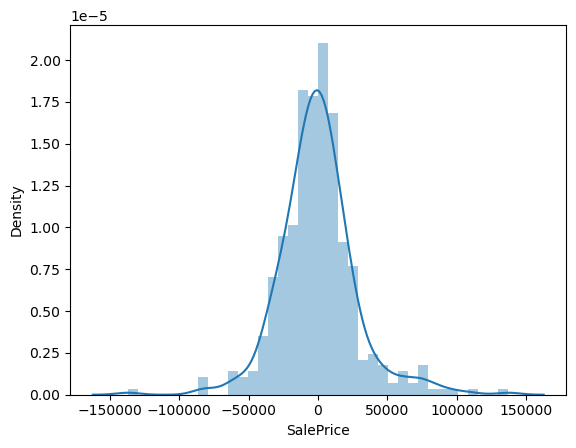

In [49]:
predict(sg_l)

In [52]:
sg_l.best_params_

{'alpha': 10, 'selection': 'random'}

## Polynomial Features-Ridge

In [21]:
from sklearn.pipeline import make_pipeline


# Create a pipeline with Polynomial Features and Ridge regression
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(), Lasso(alpha=10,selection='cyclic'))

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': range(1,6),
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
X=train_df.drop(columns="SalePrice")
Y=train_df["SalePrice"]
pca=PCA(n_components=15,svd_solver="randomized")
X=pca.fit_transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

In [23]:
# Evaluate the performance of the best model
#mse_ = mse(y_test, y_pred)
#rmse = np.sqrt(mse_)
print("Best hyperparameters:", best_params)
#print("RMSE:", rmse)

Best hyperparameters: {'polynomialfeatures__degree': 2}


In [24]:
r2_score(y_test, y_pred)

0.8578276606696909

## Polynomial Features-Linear Regression

In [55]:

# Create a pipeline with Polynomial Features and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': range(1,6)
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data

X=train_df.drop(columns="SalePrice")
Y=train_df["SalePrice"]
pca=PCA(n_components=15,svd_solver="randomized")
X=pca.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the performance of the best model
print("Best hyperparameters:", best_params)
print("R2_score:",np.round(r2_score(y_test, y_pred),3) )

mse_ = mse(y_test, y_pred)
rmse = np.sqrt(mse_)
print("RMSE:",rmse)


Best hyperparameters: {'polynomialfeatures__degree': 2}
R2_score: 0.857
RMSE: 26883.69626757263


In [ ]:
model_score=pd.DataFrame()
model_score["Model"]=model_
model_score["Score"]=score
Top5Scors=model_score.sort_values(by="Score",ascending=False)
print("The best 5 models are:")
Top5Scors

### lets strandardize our data and see the results :

In [40]:
X=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [41]:
models=[gs_3cv,gs_lr,sg_rr,sg_hgbr]

Model is: GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9341674128377749
Predictions are: [122722.19878194 124012.54279446 236771.58751123 188293.73186742
  55452.84602743]


r2 score is: 0.8717412128173209
MAE:650113435.7446464
MSE:650113435.7446464
RMSE:25497.322128895154
Model is: GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [None, 0, 1, 10, 100],
                         'positive': [True, False]})
Training score: 0.8747420732548989
Predictions are: [114916.5 106468.5 254820.5 194148.5  39140.5]


r2 score is: -9.290539526131538e+24
MAE:4.709154595896943e+34
MSE:4.709154595896943e+34
RMSE:

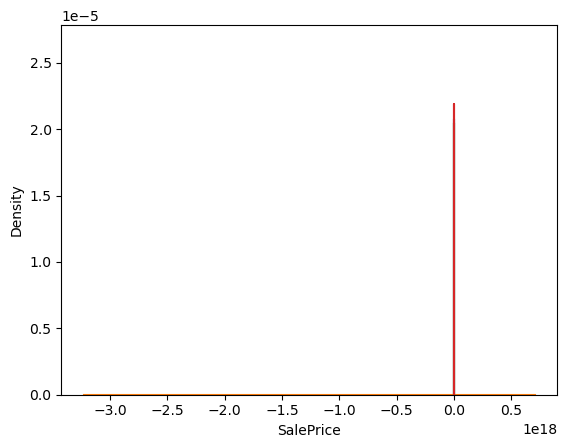

In [42]:
for mdl in models:
    predict(mdl)
    